In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [4]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [5]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [6]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [7]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
651228,Siege of Adastria,Elementia I,"['Paulo J. Mendes', 'Alina Lesnik']",0.419,0.0402,0.017200,0.759000,0.1140,0.1710,0.545,121.296,233813,2016
38890,"Leslie, Talk to Me",Highway Trance,['Jimmy LaFave'],0.394,0.0370,0.156000,0.005400,0.2070,0.1630,0.413,154.395,283667,1994
443521,Celestial Execution (Demo '85),Terminal Death,['Terminal Death'],0.240,0.1080,0.157000,0.916000,0.3270,0.4850,0.958,123.455,137573,2014
660088,I Want to Be Happy,Live At Feinstein's At Loews,"['Harry Allen,Chuck Riggs,Rossano Sportiello,J...",0.592,0.0819,0.263000,0.674000,0.6860,0.5430,0.611,145.805,462680,2011
326274,Le train de nuit,Cow-Girl dorée,['Renée martel'],0.230,0.0295,0.640000,0.000000,0.1320,0.3820,0.385,178.601,138347,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792439,Julieta,Rockstar Rebelión,['Ni Voz Ni Voto'],0.533,0.0344,0.000902,0.002770,0.0753,0.2540,0.689,140.083,252307,2012
248886,Intro To Carolina Shout,A Night In Dublin,['Dick Wellstood'],0.619,0.9150,0.425000,0.000000,0.1800,0.9640,0.124,129.259,17093,2001
1050495,Farewell Blues,Roy Smeck Plays Hawaiian Guitar,['Roy Smeck'],0.639,0.0415,0.967000,0.849000,0.1160,0.4900,0.419,98.546,177133,2005
69812,The Burden Of Ubiquitous Scars,Lesser Traveled Waters,['Gollum'],0.265,0.0552,0.000006,0.900000,0.1740,0.5100,0.924,112.475,277160,2005


In [8]:
sampled_data["Tempo"].max()

237.549

In [9]:
sampled_data["Tempo"].min()

0.0

In [10]:
tempo_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
tempo_groupings = ["Tempo <=25", "Tempo 25-50", "Tempo 50-75", "Tempo 75-100",
                "Tempo 100-125", "Tempo 125-150", "Tempo 150-175", "Tempo 175-200",
                          "Tempo 200-225", "Tempo 225-250"]
sampled_data["Tempo"] = pd.cut(sampled_data["Tempo"], tempo_bins, labels=tempo_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
651228,Siege of Adastria,Elementia I,"['Paulo J. Mendes', 'Alina Lesnik']",0.419,0.0402,0.017200,0.759000,0.1140,0.1710,0.545,Tempo 100-125,233813,2016
38890,"Leslie, Talk to Me",Highway Trance,['Jimmy LaFave'],0.394,0.0370,0.156000,0.005400,0.2070,0.1630,0.413,Tempo 150-175,283667,1994
443521,Celestial Execution (Demo '85),Terminal Death,['Terminal Death'],0.240,0.1080,0.157000,0.916000,0.3270,0.4850,0.958,Tempo 100-125,137573,2014
660088,I Want to Be Happy,Live At Feinstein's At Loews,"['Harry Allen,Chuck Riggs,Rossano Sportiello,J...",0.592,0.0819,0.263000,0.674000,0.6860,0.5430,0.611,Tempo 125-150,462680,2011
326274,Le train de nuit,Cow-Girl dorée,['Renée martel'],0.230,0.0295,0.640000,0.000000,0.1320,0.3820,0.385,Tempo 175-200,138347,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792439,Julieta,Rockstar Rebelión,['Ni Voz Ni Voto'],0.533,0.0344,0.000902,0.002770,0.0753,0.2540,0.689,Tempo 125-150,252307,2012
248886,Intro To Carolina Shout,A Night In Dublin,['Dick Wellstood'],0.619,0.9150,0.425000,0.000000,0.1800,0.9640,0.124,Tempo 125-150,17093,2001
1050495,Farewell Blues,Roy Smeck Plays Hawaiian Guitar,['Roy Smeck'],0.639,0.0415,0.967000,0.849000,0.1160,0.4900,0.419,Tempo 75-100,177133,2005
69812,The Burden Of Ubiquitous Scars,Lesser Traveled Waters,['Gollum'],0.265,0.0552,0.000006,0.900000,0.1740,0.5100,0.924,Tempo 100-125,277160,2005


In [29]:
#getting count of each category and converting to percentage for pie chart
tempo_lessthan_25 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo <=25'].count())/12040)*100
tempo_lessthan_25

Song Title          0.257475
Album Title         0.257475
Artists             0.257475
Danceability        0.257475
Speechiness         0.257475
Acousticness        0.257475
Instrumentalness    0.257475
Liveness            0.257475
Valence             0.257475
Energy              0.257475
Tempo               0.257475
Duration(ms)        0.257475
Release Year        0.257475
dtype: float64

In [18]:
tempo_25to50 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 25-50'].count())/12040)*100
tempo_25to50

Song Title          0.141196
Album Title         0.141196
Artists             0.141196
Danceability        0.141196
Speechiness         0.141196
Acousticness        0.141196
Instrumentalness    0.141196
Liveness            0.141196
Valence             0.141196
Energy              0.141196
Tempo               0.141196
Duration(ms)        0.141196
Release Year        0.141196
dtype: float64

In [19]:
tempo_50to75 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 50-75'].count())/12040)*100
tempo_50to75

Song Title          5.440199
Album Title         5.440199
Artists             5.440199
Danceability        5.440199
Speechiness         5.440199
Acousticness        5.440199
Instrumentalness    5.440199
Liveness            5.440199
Valence             5.440199
Energy              5.440199
Tempo               5.440199
Duration(ms)        5.440199
Release Year        5.440199
dtype: float64

In [20]:
tempo_75to100 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 75-100'].count())/12040)*100
tempo_75to100

Song Title          25.830565
Album Title         25.830565
Artists             25.830565
Danceability        25.830565
Speechiness         25.830565
Acousticness        25.830565
Instrumentalness    25.830565
Liveness            25.830565
Valence             25.830565
Energy              25.830565
Tempo               25.830565
Duration(ms)        25.830565
Release Year        25.830565
dtype: float64

In [21]:
tempo_100to125 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 100-125'].count())/12040)*100
tempo_100to125

Song Title          29.04485
Album Title         29.04485
Artists             29.04485
Danceability        29.04485
Speechiness         29.04485
Acousticness        29.04485
Instrumentalness    29.04485
Liveness            29.04485
Valence             29.04485
Energy              29.04485
Tempo               29.04485
Duration(ms)        29.04485
Release Year        29.04485
dtype: float64

In [22]:
tempo_125to150 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 125-150'].count())/12040)*100
tempo_125to150

Song Title          25.049834
Album Title         25.049834
Artists             25.049834
Danceability        25.049834
Speechiness         25.049834
Acousticness        25.049834
Instrumentalness    25.049834
Liveness            25.049834
Valence             25.049834
Energy              25.049834
Tempo               25.049834
Duration(ms)        25.049834
Release Year        25.049834
dtype: float64

In [23]:
tempo_150to175 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 150-175'].count())/12040)*100
tempo_150to175

Song Title          9.742525
Album Title         9.742525
Artists             9.742525
Danceability        9.742525
Speechiness         9.742525
Acousticness        9.742525
Instrumentalness    9.742525
Liveness            9.742525
Valence             9.742525
Energy              9.742525
Tempo               9.742525
Duration(ms)        9.742525
Release Year        9.742525
dtype: float64

In [24]:
tempo_175to200 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 175-200'].count())/12040)*100
tempo_175to200

Song Title          3.936877
Album Title         3.936877
Artists             3.936877
Danceability        3.936877
Speechiness         3.936877
Acousticness        3.936877
Instrumentalness    3.936877
Liveness            3.936877
Valence             3.936877
Energy              3.936877
Tempo               3.936877
Duration(ms)        3.936877
Release Year        3.936877
dtype: float64

In [25]:
tempo_200to225 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 200-225'].count())/12040)*100
tempo_200to225

Song Title          0.548173
Album Title         0.548173
Artists             0.548173
Danceability        0.548173
Speechiness         0.548173
Acousticness        0.548173
Instrumentalness    0.548173
Liveness            0.548173
Valence             0.548173
Energy              0.548173
Tempo               0.548173
Duration(ms)        0.548173
Release Year        0.548173
dtype: float64

In [26]:
tempo_225to250 = ((sampled_data.loc[sampled_data["Tempo"]=='Tempo 225-250'].count())/12040)*100
tempo_225to250

Song Title          0.008306
Album Title         0.008306
Artists             0.008306
Danceability        0.008306
Speechiness         0.008306
Acousticness        0.008306
Instrumentalness    0.008306
Liveness            0.008306
Valence             0.008306
Energy              0.008306
Tempo               0.008306
Duration(ms)        0.008306
Release Year        0.008306
dtype: float64

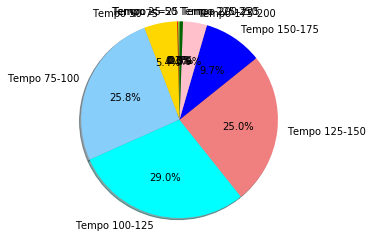

In [52]:
#pie chart
labels = ["Tempo <=25", "Tempo 25-50", "Tempo 50-75", "Tempo 75-100", "Tempo 100-125", "Tempo 125-150", "Tempo 150-175", "Tempo 175-200", "Tempo 200-225", "Tempo 225-250"]
sizes = [  0.257475, 0.141196, 5.440199, 25.830565, 29.04485, 25.049834, 9.742525,
        3.936877, 0.548173, 0.008306]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral','blue','pink', 'darkgreen', 
          'yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, radius=1.2)
ax1.axis('equal')


plt.show()